In [2]:
import cv2
import numpy as np
import math
import os

protoFile = "models/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "models/pose_iter_160000.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [20]:
#Demo source: https://learnopencv.com/deep-learning-based-human-pose-estimation-using-opencv-cpp-python/

In [58]:
BODY_PARTS = {
    0: "Head", 1: "Neck", 2: "RShoulder", 3: "RElbow", 4: "RWrist",
    5: "LShoulder", 6: "LElbow", 7: "LWrist", 8: "RHip", 9: "RKnee",
    10: "RAnkle", 11: "LHip", 12: "LKnee", 13: "LAnkle", 14: "Chest"
}

# Read image
frame = cv2.imread("./tennis/sc6.png")
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

# Prepare input
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
net.setInput(inpBlob)
output = net.forward()

H = output.shape[2]
W = output.shape[3]

points = []

for i in range(len(BODY_PARTS)):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H
    if prob > threshold:
        cv2.circle(frame, (int(x), int(y)), 15, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA)
 
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else:
        points.append(None)
 
cv2.imshow("Output-Keypoints", frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
def angle(p1,p2,p3):
    a1 = np.array(p1)
    a2 = np.array(p2)
    a3 = np.array(p3)

    v1 = a1-a2
    v2 = a3-a2

    dot = np.dot(v1,v2)

    v1mag = np.linalg.norm(v1)
    v2mag = np.linalg.norm(v2)
    
    # Calculate the cosine of the angle using the dot product formula
    cos = dot / (v1mag * v2mag)
    cos = np.clip(cos, -1, 1)
    
    # Calculate the angle in radians and then convert to degrees
    angle_radians = np.arccos(cos)
    angle = np.degrees(angle_radians)
    
    return angle

In [83]:
directory_01 = "./tennis/images/01.backhand_back"
#Measure average angle for each type of stroke relevant to form improvement (angles used will differ based on stroke)

angles_left01 = []
angles_right01 = []
for filename in os.listdir(directory_01):
    filepath = os.path.join(directory_01, filename)
    frame = cv2.imread(filepath)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    
    # Prepare input
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    
    H = output.shape[2]
    W = output.shape[3]
    points = []
    for i in range(len(BODY_PARTS)):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        points.append(point)
    angle_left = angle(points[5], points[6], points[7])
    angle_right = angle(points[2], points[3], points[4])
    if not np.isnan(angle_left):
        angles_left01.append(angle_left)
    if not np.isnan(angle_right):
        angles_right01.append(angle_right)

average_left01=sum(angles_left01)/len(angles_left01)
average_right01 = sum(angles_right01)/len(angles_right01)


C:\Users\walui\AppData\Local\Temp\ipykernel_451048\1608172648.py:15: RuntimeWarning: invalid value encountered in scalar divide
  cos = dot / (v1mag * v2mag)


In [55]:
angle(points2[2],points2[3],points2[4])

np.float64(105.25511870305779)

In [84]:
directory_02 = "./tennis/images/02.backhand_front"
angles_left02 = []
angles_right02 = []

for filename in os.listdir(directory_02):
    filepath = os.path.join(directory_02, filename)
    frame = cv2.imread(filepath)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    
    # Prepare input
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    
    H = output.shape[2]
    W = output.shape[3]
    points = []
    for i in range(len(BODY_PARTS)):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        points.append(point)
    angle_left = angle(points[5], points[6], points[7])
    angle_right = angle(points[2], points[3], points[4])
    if not np.isnan(angle_left):
        angles_left02.append(angle_left)
    if not np.isnan(angle_right):
        angles_right02.append(angle_right)

average_left02=sum(angles_left02)/len(angles_left02)
average_right02 = sum(angles_right02)/len(angles_right02)

C:\Users\walui\AppData\Local\Temp\ipykernel_451048\1608172648.py:15: RuntimeWarning: invalid value encountered in scalar divide
  cos = dot / (v1mag * v2mag)


In [85]:
directory_03 = "./tennis/images/03.forehand_back"
angles_right03 = []

for filename in os.listdir(directory_03):
    filepath = os.path.join(directory_03, filename)
    frame = cv2.imread(filepath)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    
    # Prepare input
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    
    H = output.shape[2]
    W = output.shape[3]
    points = []
    for i in range(len(BODY_PARTS)):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        points.append(point)
    angle_right = angle(points[2], points[3], points[4])
    if not np.isnan(angle_right):
        angles_right03.append(angle_right)

average_right03 = sum(angles_right03)/len(angles_right03)

C:\Users\walui\AppData\Local\Temp\ipykernel_451048\1608172648.py:15: RuntimeWarning: invalid value encountered in scalar divide
  cos = dot / (v1mag * v2mag)


In [86]:
directory_04 = "./tennis/images/04.forehand_front"
angles_right04 = []

for filename in os.listdir(directory_04):
    filepath = os.path.join(directory_04, filename)
    frame = cv2.imread(filepath)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    
    # Prepare input
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    
    H = output.shape[2]
    W = output.shape[3]
    points = []
    for i in range(len(BODY_PARTS)):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        points.append(point)
    angle_right = angle(points[2], points[3], points[4])
    if not np.isnan(angle_right):
        angles_right04.append(angle_right)

average_right04 = sum(angles_right04)/len(angles_right04)

C:\Users\walui\AppData\Local\Temp\ipykernel_451048\1608172648.py:15: RuntimeWarning: invalid value encountered in scalar divide
  cos = dot / (v1mag * v2mag)


In [88]:
directory_05 = "./tennis/images/05.serve_back"
angles_right05 = []
angles_body05 = []
for filename in os.listdir(directory_05):
    filepath = os.path.join(directory_05, filename)
    frame = cv2.imread(filepath)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    
    # Prepare input
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    
    H = output.shape[2]
    W = output.shape[3]
    points = []
    for i in range(len(BODY_PARTS)):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        points.append(point)
    angle_right = angle(points[2], points[3], points[4])
    angle_body = angle(points[2], points[8], points[10])
    if not np.isnan(angle_right):
        angles_right05.append(angle_right)
    if not np.isnan(angle_body):
        angles_body05.append(angle_body)

average_right05 = sum(angles_right05)/len(angles_right05)
average_body05 = sum(angles_body05)/len(angles_body05)

C:\Users\walui\AppData\Local\Temp\ipykernel_451048\1608172648.py:15: RuntimeWarning: invalid value encountered in scalar divide
  cos = dot / (v1mag * v2mag)


In [89]:
directory_06 = "./tennis/images/06.serve_front"
angles_right06 = []
angles_body06 = []
for filename in os.listdir(directory_06):
    filepath = os.path.join(directory_06, filename)
    frame = cv2.imread(filepath)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    
    # Prepare input
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    
    H = output.shape[2]
    W = output.shape[3]
    points = []
    for i in range(len(BODY_PARTS)):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        points.append(point)
    angle_right = angle(points[2], points[3], points[4])
    angle_body = angle(points[2], points[8], points[10])
    if not np.isnan(angle_right):
        angles_right06.append(angle_right)
    if not np.isnan(angle_body):
        angles_body06.append(angle_body)

average_right06 = sum(angles_right06)/len(angles_right06)
average_body06 = sum(angles_body06)/len(angles_body06)

C:\Users\walui\AppData\Local\Temp\ipykernel_451048\1608172648.py:15: RuntimeWarning: invalid value encountered in scalar divide
  cos = dot / (v1mag * v2mag)


In [97]:
import torch.nn as nn
from torchvision import datasets
from dataclasses import dataclass
from typing import List, Dict, Any
from torch.utils.data import DataLoader, random_split
from transformers import AutoImageProcessor, AutoModel, AutoConfig, get_cosine_schedule_with_warmup

class DinoV3Linear(nn.Module):
    def __init__(self, backbone: AutoModel, num_classes: int, freeze_backbone: bool = True):
        super().__init__()
        self.backbone = backbone
        if freeze_backbone:
            for p in self.backbone.parameters():
                p.requires_grad = False
            self.backbone.eval()
        
        hidden_size = getattr(backbone.config, "hidden_size", None)
        self.head = nn.Linear(hidden_size, num_classes)

    def forward(self, pixel_values):
        outputs = self.backbone(pixel_values=pixel_values)
        last_hidden = outputs.last_hidden_state
        cls = last_hidden[:, 0]
        logits = self.head(cls)
        return logits

C:\Users\walui\AppData\Local\Temp\ipykernel_451048\205408266.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("./weights/model_best.pt")


Example Prediction: forehand_back


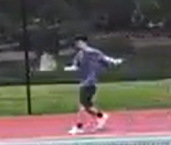

In [111]:
import torch
import transformers
import json
from PIL import Image

strokes = {
    0: "backhand_back",
    1: "backhand_front",
    2: "forehand_back",
    3: "forehand_front",
    4: "serve_front",
    5: "serve_back"
}
MODEL_NAME = "dinov3-vitb16-pretrain-lvd1689m"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes=6
image_processor = AutoImageProcessor.from_pretrained(MODEL_NAME)
backbone = AutoModel.from_pretrained(MODEL_NAME)
image_processor_config = json.loads(image_processor.to_json_string())
backbone_config = json.loads(AutoConfig.from_pretrained(MODEL_NAME).to_json_string())

freeze_backbone = True
model = DinoV3Linear(backbone, num_classes, freeze_backbone=freeze_backbone).to(device)
checkpoint = torch.load("./weights/model_best.pt")
model.load_state_dict(checkpoint['model_state_dict'], strict=False)



Stroke Prediction: serve_back
Right arm angle: 71.56505117707799, suggested angle: 147.31705636158074
Body angle: 175.95551442581888, suggested angle: 163.8924938311867
Score: 0.8780346864178681


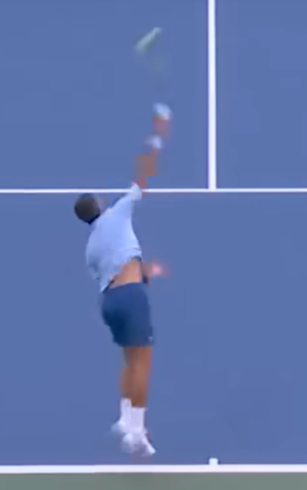

In [129]:
def evaluate_stroke(filepath):
    img = Image.open(filepath).convert("RGB")
    inputs = image_processor(images=img, return_tensors="pt").to(device)
    logits = model(inputs["pixel_values"])
    probs = torch.softmax(logits, dim=-1)
    pred = probs.argmax(dim=-1).item()
    print(f"Stroke Prediction: {strokes[pred]}") 
    

    frame = cv2.imread(filepath)
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    threshold = 0.1
    
    # Prepare input
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (368, 368), (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    
    H = output.shape[2]
    W = output.shape[3]
    points = []
    for i in range(len(BODY_PARTS)):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        points.append(point)

    score=0
    if pred == 0: #backhand_back
        angle_left = angle(points[5], points[6], points[7])
        angle_right = angle(points[2], points[3], points[4])
        print(f"Left arm angle: {angle_left}, suggested angle: {average_left01}")
        print(f"Right arm angle: {angle_right}, suggested angle: {average_right01}")
        score = ((360-abs(angle_left - average_left01))/360)/2 +((360-abs(angle_right - average_right01))/360)/2
    if pred == 1: #backhand_front
        angle_left = angle(points[5], points[6], points[7])
        angle_right = angle(points[2], points[3], points[4])
        print(f"Left arm angle: {angle_left}, suggested angle: {average_left02}")
        print(f"Right arm angle: {angle_right}, suggested angle: {average_right02}")
        score = ((360-abs(angle_left - average_left02))/360)/2 +((360-abs(angle_right - average_right02))/360)/2
    if pred == 2: #forehand_back
        angle_right = angle(points[2], points[3], points[4])
        print(f"Right arm angle: {angle_right}, suggested angle: {average_right03}")
        score = (360-abs(int(angle_right) - int(average_right03)))/360
    if pred == 3: #forehand_front
        angle_right = angle(points[2], points[3], points[4])
        print(f"Right arm angle: {angle_right}, suggested angle: {average_right04}")
        score = (360-abs(int(angle_right) - int(average_right04)))/360
    if pred == 4: #serve_back
        angle_right = angle(points[2], points[3], points[4])
        angle_body = angle(points[2], points[8], points[10])
        print(f"Right arm angle: {angle_right}, suggested angle: {average_right05}")
        print(f"Body angle: {angle_body}, suggested angle: {average_body05}")
        score = ((360-abs(angle_right - average_right05))/360)/2 +((360-abs(angle_body - average_body05))/360)/2
    if pred == 5: #serve_front
        angle_right = angle(points[2], points[3], points[4])
        angle_body = angle(points[2], points[8], points[10])
        print(f"Right arm angle: {angle_right}, suggested angle: {average_right06}")
        print(f"Body angle: {angle_body}, suggested angle: {average_body06}")
        score = ((360-abs(angle_right - average_right06))/360)/2 +((360-abs(angle_body - average_body06))/360)/2
    print(f"Score: {score}")
    return img
    

evaluate_stroke("./tennis/sc6.png")

Stroke Prediction: forehand_back
Right arm angle: 164.74488129694225, suggested angle: 92.92646680341743
Score: 0.8


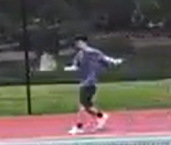

In [132]:
evaluate_stroke("./tennis/sc1.png")